<a href="https://colab.research.google.com/github/Sibinn-p/hranalytics/blob/main/finalassesmwant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:

# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [52]:
df=pd.read_csv('train_LZdllcl.csv')

In [53]:
dft=pd.read_csv('test_2umaH9m.csv')

In [54]:
df.shape

(54808, 14)

In [55]:
dft.shape

(23490, 13)

In [56]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [57]:
dft.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [59]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [60]:
pd.isnull(df).sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [61]:
pd.isnull(dft).sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [62]:
df.duplicated().sum()

0

In [63]:
dft.duplicated().sum()

0

In [64]:
df.dropna(inplace=True)

In [65]:
dft.dropna(inplace=True)

In [66]:
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers
for column in df.select_dtypes(include=['number']):
  outliers = detect_outliers_iqr(df[column])
  if not outliers.empty:
    print(f"Outliers in '{column}': {outliers.tolist()}")

Outliers in 'no_of_trainings': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 2, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 6, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3,

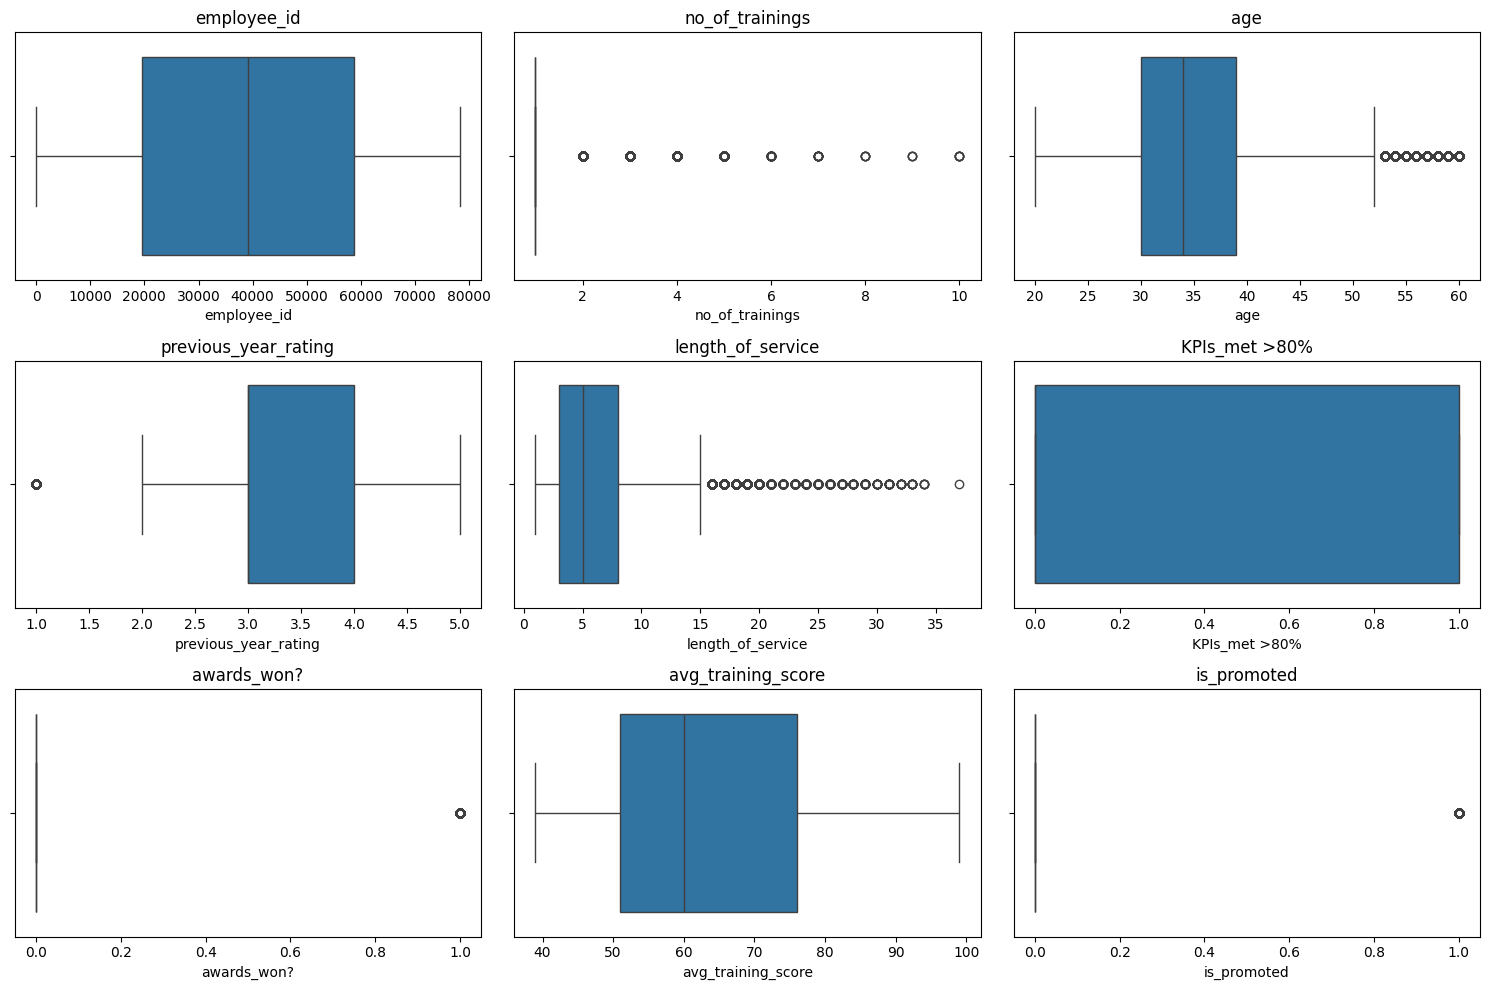

In [67]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

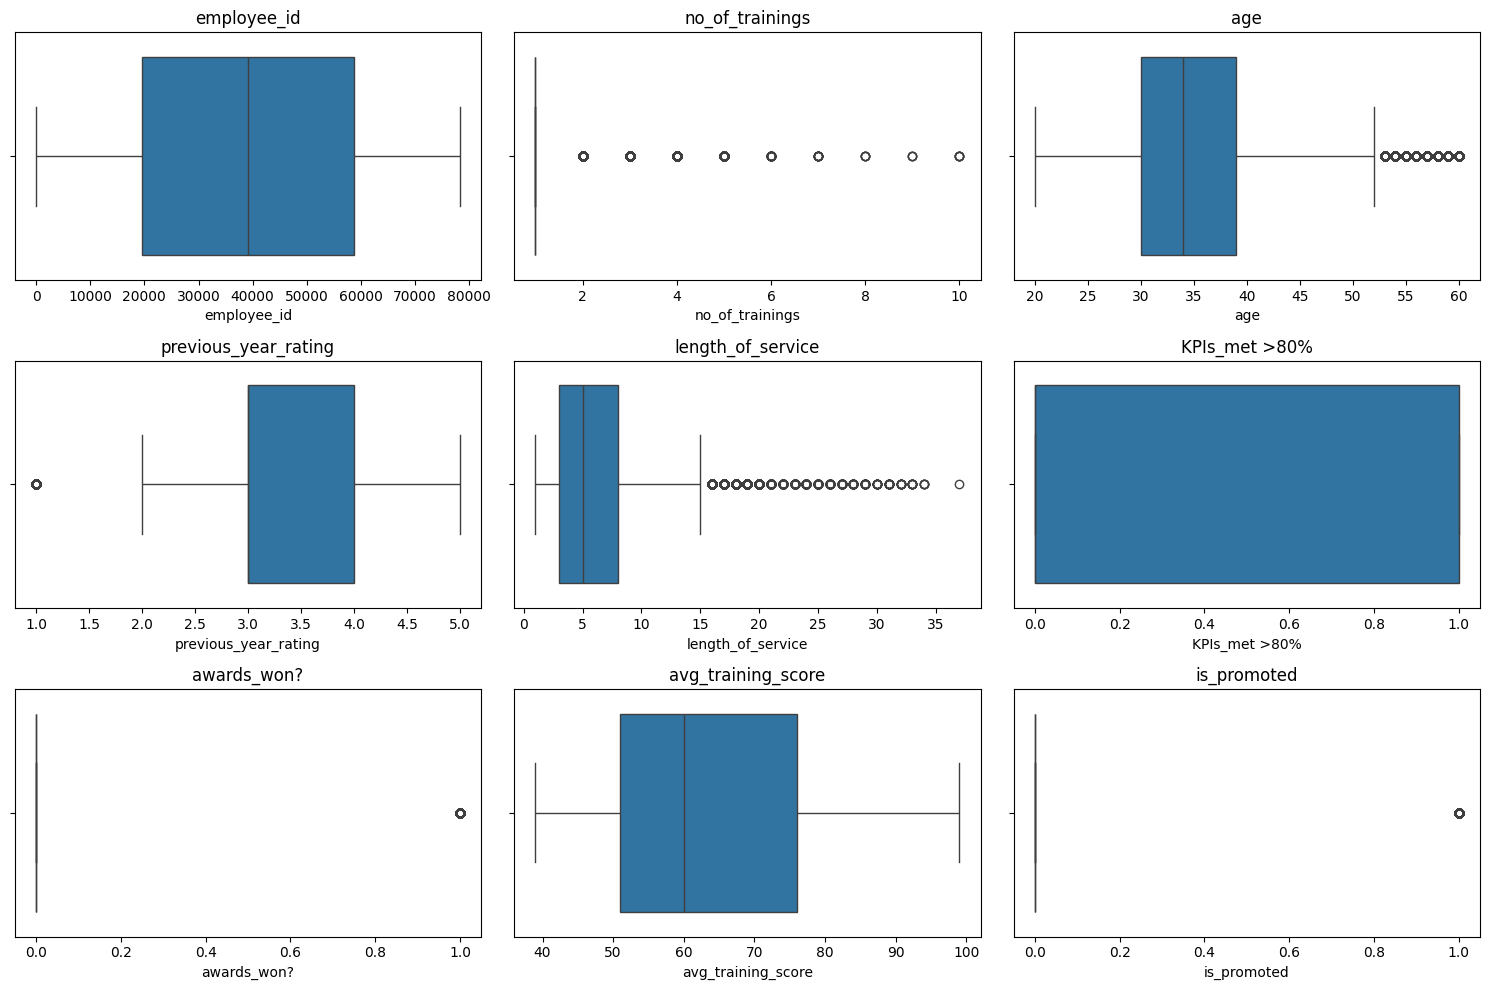

In [68]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

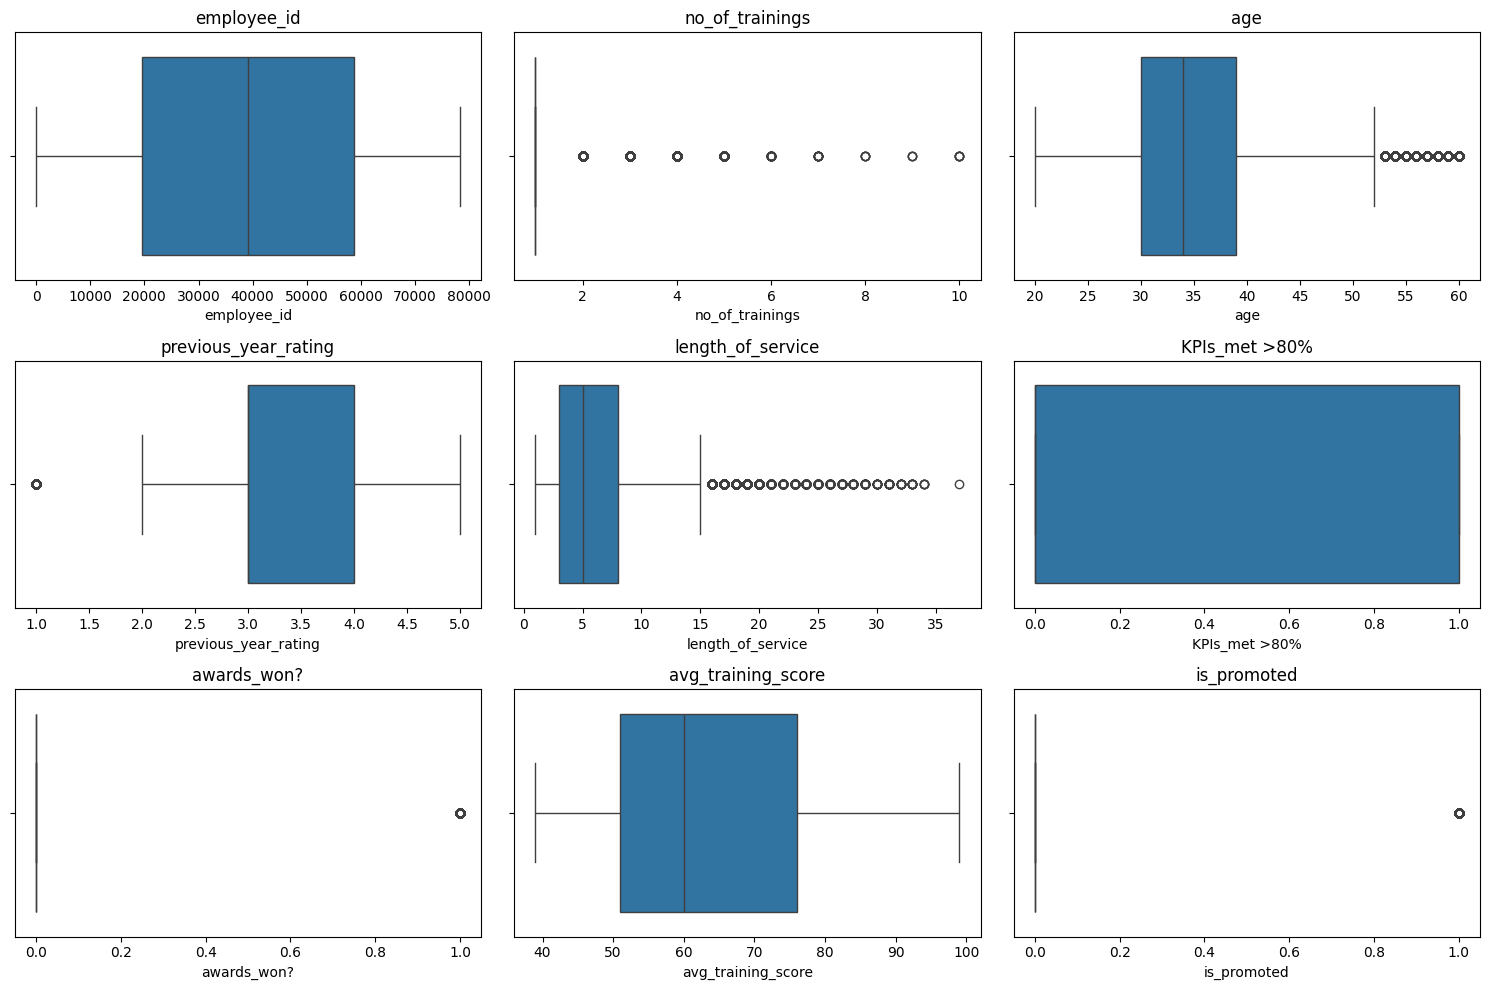

In [69]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

In [70]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [71]:
dft.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

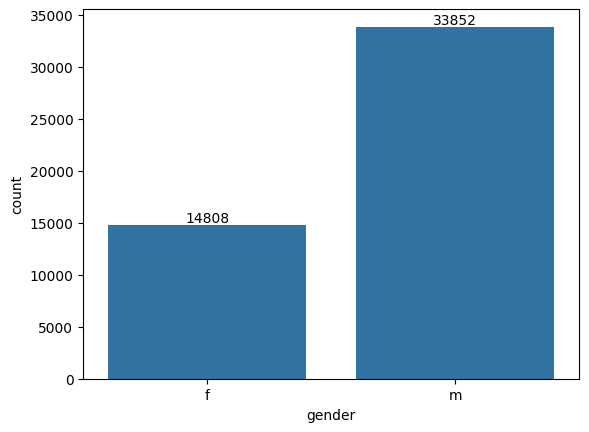

In [72]:
ax = sns.countplot(x = 'gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

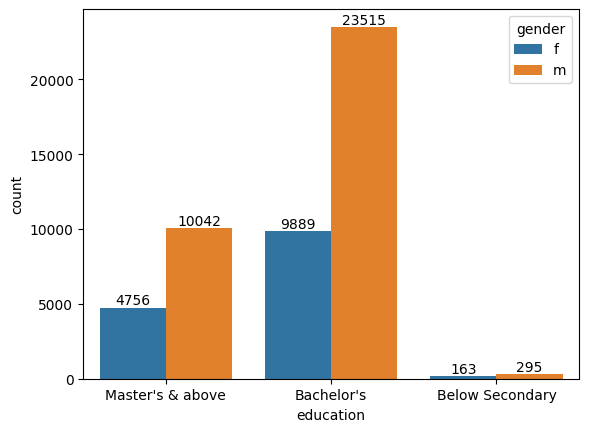

In [73]:
ax = sns.countplot(data = df, x = 'education', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

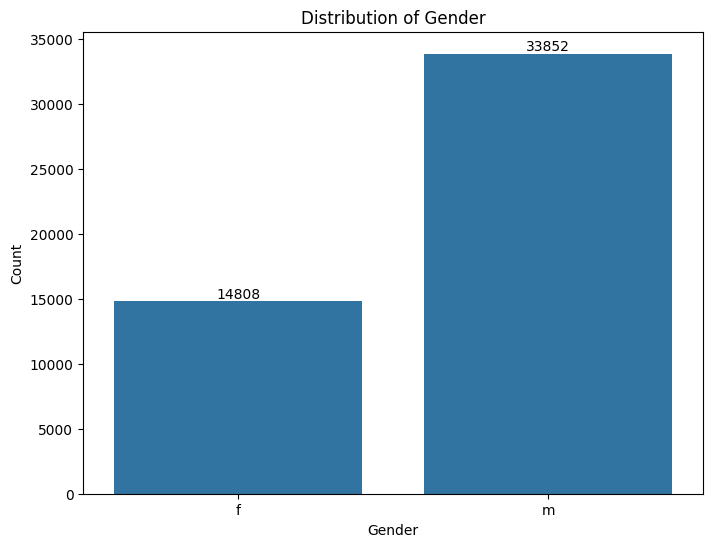

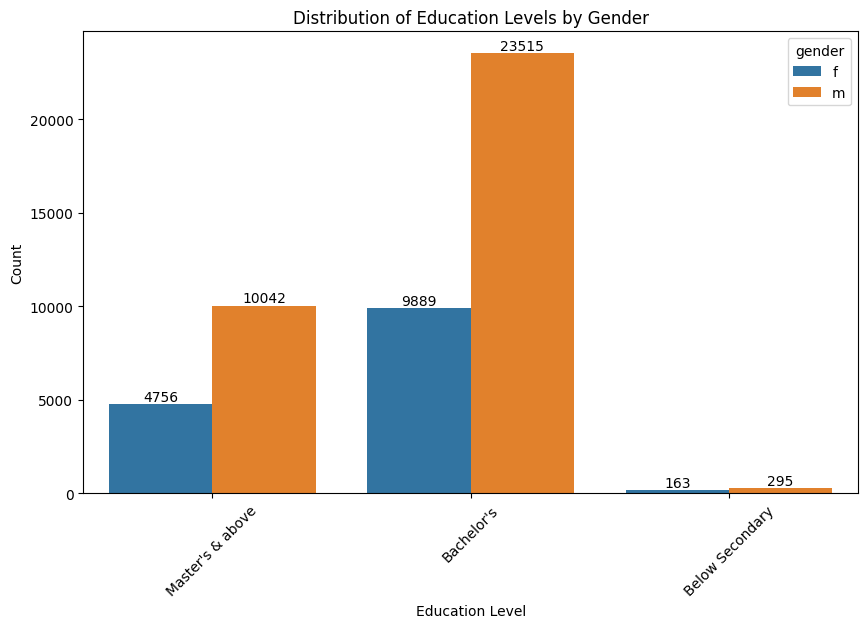

In [74]:
# prompt: Modeling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

# import python libraries

%matplotlib inline



# Gender distribution
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
ax = sns.countplot(x='gender', data=df)
ax.set_title('Distribution of Gender') # Add a title
ax.set_xlabel('Gender') # Add x-axis label
ax.set_ylabel('Count') # Add y-axis label
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Education level distribution by gender
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = sns.countplot(data=df, x='education', hue='gender')
ax.set_title('Distribution of Education Levels by Gender') # Add a title
ax.set_xlabel('Education Level') # Add x-axis label
ax.set_ylabel('Count') # Add y-axis label
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()



In [75]:
# prompt: label encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for column in ['gender', 'education']:  # Replace with your actual categorical column names
    df[column] = le.fit_transform(df[column])
    dft[column] = le.transform(dft[column]) # Apply the same encoding to the test set

# Display the updated DataFrame
print(df.head())
print(dft.head())


   employee_id         department     region  education  gender  \
0        65438  Sales & Marketing   region_7          2       0   
1        65141         Operations  region_22          0       1   
2         7513  Sales & Marketing  region_19          0       1   
3         2542  Sales & Marketing  region_23          0       1   
4        48945         Technology  region_26          0       1   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0   

In [80]:
# prompt: Impute missing values in df

# Check for missing values in the DataFrame
print(df.isnull().sum())

# Impute missing values using the mean for numerical columns
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values using the mode for categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<ipython-input-80-6461f3be768b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-80-6461f3be768b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable column

# Separate features (X) and target variable (y)
# Perform Label Encoding before train_test_split to avoid data leakage
X = df.drop('is_promoted', axis=1)  # Replace 'target_column' with the actual name
# Initialize LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col]) # Fit and transform on the entire feature set



y = df['is_promoted']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Find the best model
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]}")

# Find the best model
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best model is Random Forest with an accuracy of 0.9320797369502671
The best model is Random Forest with an accuracy of 0.9320797369502671


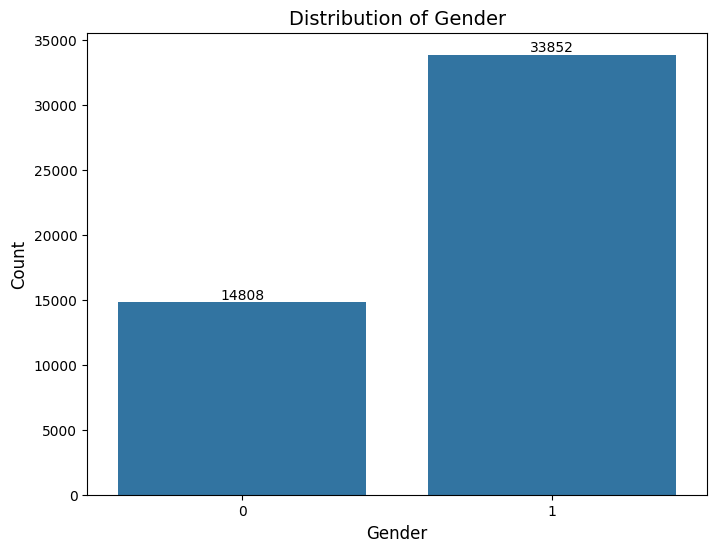

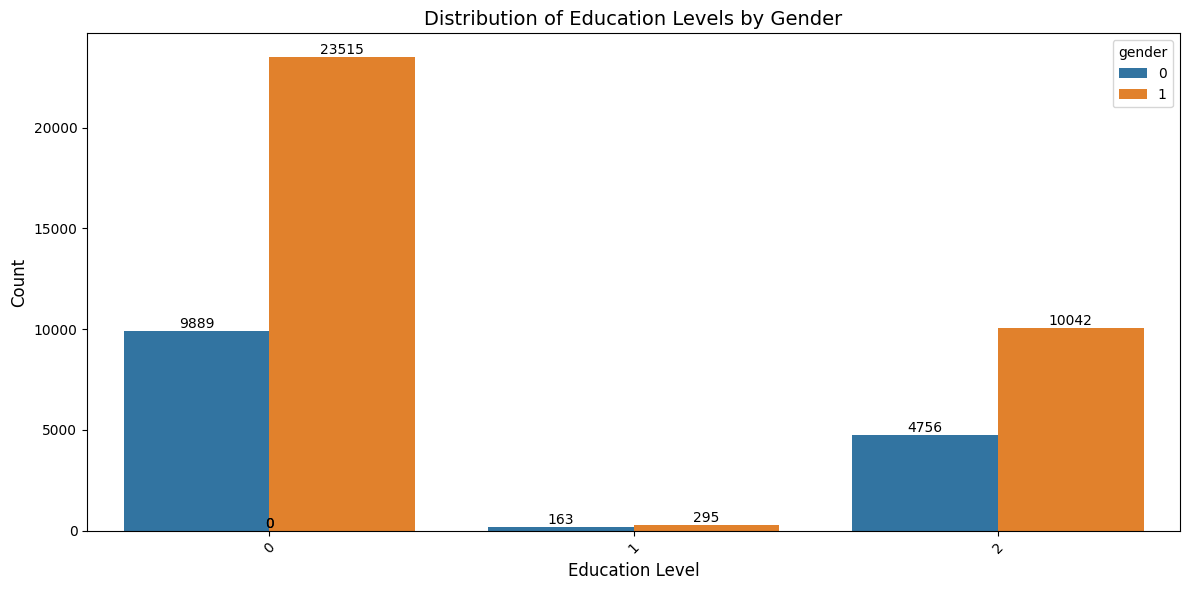

In [77]:
# : fine tubbing


# Fine-tuning visualizations

# Gender distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=df)
ax.set_title('Distribution of Gender', fontsize=14)  # Increased font size
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='both', labelsize=10) # Adjust tick label size

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')  # Improved annotation placement

plt.show()


# Education level distribution by gender
plt.figure(figsize=(12, 6))  # Wider figure for better label readability
ax = sns.countplot(data=df, x='education', hue='gender')
ax.set_title('Distribution of Education Levels by Gender', fontsize=14)
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate and adjust label size
ax.tick_params(axis='y', labelsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [111]:
# prompt: Replace the target column with the prediction value

# ... (Your existing code) ...

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ... (Your existing code) ...

# Predict on the test set using the best model
if best_model == "Logistic Regression":
    best_model_instance = LogisticRegression()
elif best_model == "Random Forest":
    best_model_instance = RandomForestClassifier()
elif best_model == "Support Vector Machine":
    best_model_instance = SVC()
else:
    raise ValueError("Invalid best model name.")




# Replace the target column in the test set with predictions


# Now X_test contains the original features and the predicted 'is_promoted' values
print(X_test.head())

       employee_id  department  region  education  gender  \
27936     0.741701           8      15        0.0     1.0   
28570     0.362070           8      33        0.0     1.0   
18311     0.753426           4      21        0.0     1.0   
46523     0.513723           7      28        1.0     1.0   
26425     0.422072           4      11        0.0     1.0   

       recruitment_channel  no_of_trainings    age  previous_year_rating  \
27936                    0         0.000000  0.325                  0.50   
28570                    0         0.000000  0.350                  0.75   
18311                    0         0.111111  0.300                  0.75   
46523                    0         0.000000  0.625                  0.50   
26425                    0         0.000000  0.425                  0.00   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
27936           0.194444            0.0          0.0            0.633333   
28570           0.138889

In [113]:
# prompt: dowload employee_id and is_promoted

import pandas as pd

# Load the DataFrame (assuming it's already loaded as 'df')
# ... (Your existing code to load the DataFrame) ...

# Select the 'employee_id' and 'is_promoted' columns
employee_data = df[['employee_id', 'is_promoted']]

# Save the selected data to a CSV file
employee_data.to_csv('employee_data.csv', index=False)

In [116]:
# prompt: download this as csv file in device

from google.colab import files
files.download('employee_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>